In [9]:
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [10]:
import numpy as np

from matplotlib import pyplot as plt

from modules import utils, fitting

import importlib
importlib.reload(utils)
importlib.reload(fitting)

utils.set_plot_configs()

In [ ]:
class PhotoelectricData:
    def __init__(self,data_file_base='data/25-02-25_364nm'):

        pass

    def _read_data(self,data_file):

        l = np.array([])
        Is = []

        with open(data_file,'r') as f:
            for line in f.readlines():
                line_data = line.split()
                
                l = np.append(l,float(line_data[0]))
                Is.append(np.array([
                    float(x) for x in line_data[1:]
                ]))

        return l, Is

    def _analyse_single_bin(self,I):
        
        bayes_gaussian = fitting.BayesianGaussian(I)

        return bayes_gaussian.mu, bayes_gaussian.sigma, bayes_gaussian.chisqr
    
    def _analyse_all_bins(self,Is):

        I_mu = np.array([])
        I_sigma = np.array([])
        I_reduced_chisqr = np.array([])

        for I in Is:
            mu, sigma, chisqr = self._analyse_single_bin(I)

            I_mu = np.append(I_mu,mu)
            I_sigma = np.append(I_sigma,sigma)
            I_reduced_chisqr = np.append(I_reduced_chisqr,chisqr/I.shape[0])

        return I_mu, I_sigma, I_reduced_chisqr

In [16]:
photoelectric_data = PhotoelectricData()
print(photoelectric_data.I_reduced_chisqr)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00000002 1.00000003 1.         1.         1.00000002
 1.         1.         1.         1.         1.         1.
 1.         1.00000002 1.         1.         1.         1.
 1.         1.00000002 1.         1.00000002 1.         1.
 1.        ]


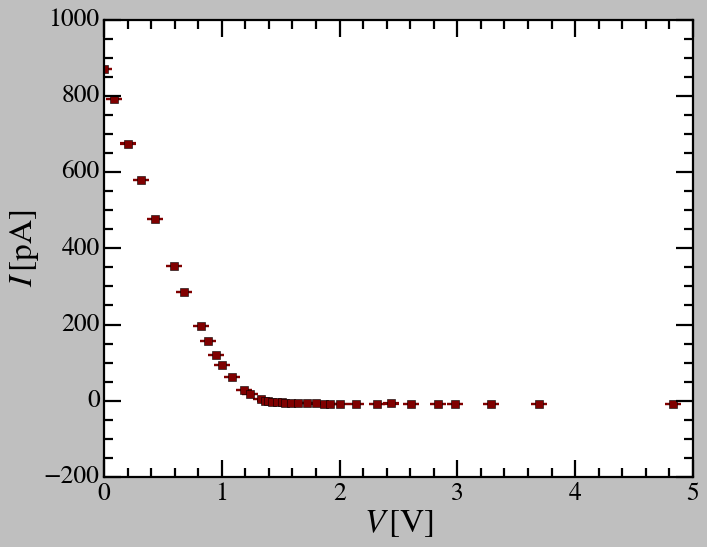

In [20]:
fig, ax = plt.subplots(figsize=(9,7))

ax.errorbar(photoelectric_data.l,photoelectric_data.I_mu,yerr=photoelectric_data.I_sigma,
             color='maroon',fmt=' s', markersize=7.5,elinewidth=3,capsize=7.5,capthick=2)

ax.set_xlabel(r'$V \, [{\rm{V}}]$')
ax.set_ylabel(r'$I \, [{\rm{pA}}]$')

plt.tight_layout()
plt.show()